<a href="https://colab.research.google.com/github/RamuRamu-12/Machine_learning_projects/blob/main/loan_approval_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd

 Since the error "  Unmatched ''"' when when decoding 'string' "  occurs,the below line has been done to check the mistakes

 * The JSONDecodeError is caused by an unterminated string in the JSON file. This could be due to a missing closing quotation mark or an invalid escape sequence.

In [7]:
!cat /content/drive/MyDrive/SlashMark/loan_approval/loan_approval_dataset.json | grep -o "\"$"

In [8]:
import json

with open('/content/drive/MyDrive/SlashMark/loan_approval/loan_approval_dataset.json', 'r') as f:
    data = json.load(f)

In [9]:
df = pd.read_json('/content/drive/MyDrive/SlashMark/loan_approval/loan_approval_dataset.json')

In [10]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Data Cleaning,Preprocessing and Visualisation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [12]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:

df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,252000.0,NaN,NaN,NaN,126000.5,72746.278255,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,NaN,NaN,NaN,4997116.665325,2878311.013611,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,NaN,NaN,NaN,49.954071,17.063855,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,NaN,NaN,NaN,10.084437,6.00259,0.0,5.0,10.0,15.0,20.0
Married/Single,252000,2,single,226272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_Ownership,252000,3,rented,231898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Ownership,252000,2,no,176000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,252000,51,Physician,5957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,252000,317,Vijayanagaram,1259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,252000,29,Uttar_Pradesh,28400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [16]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

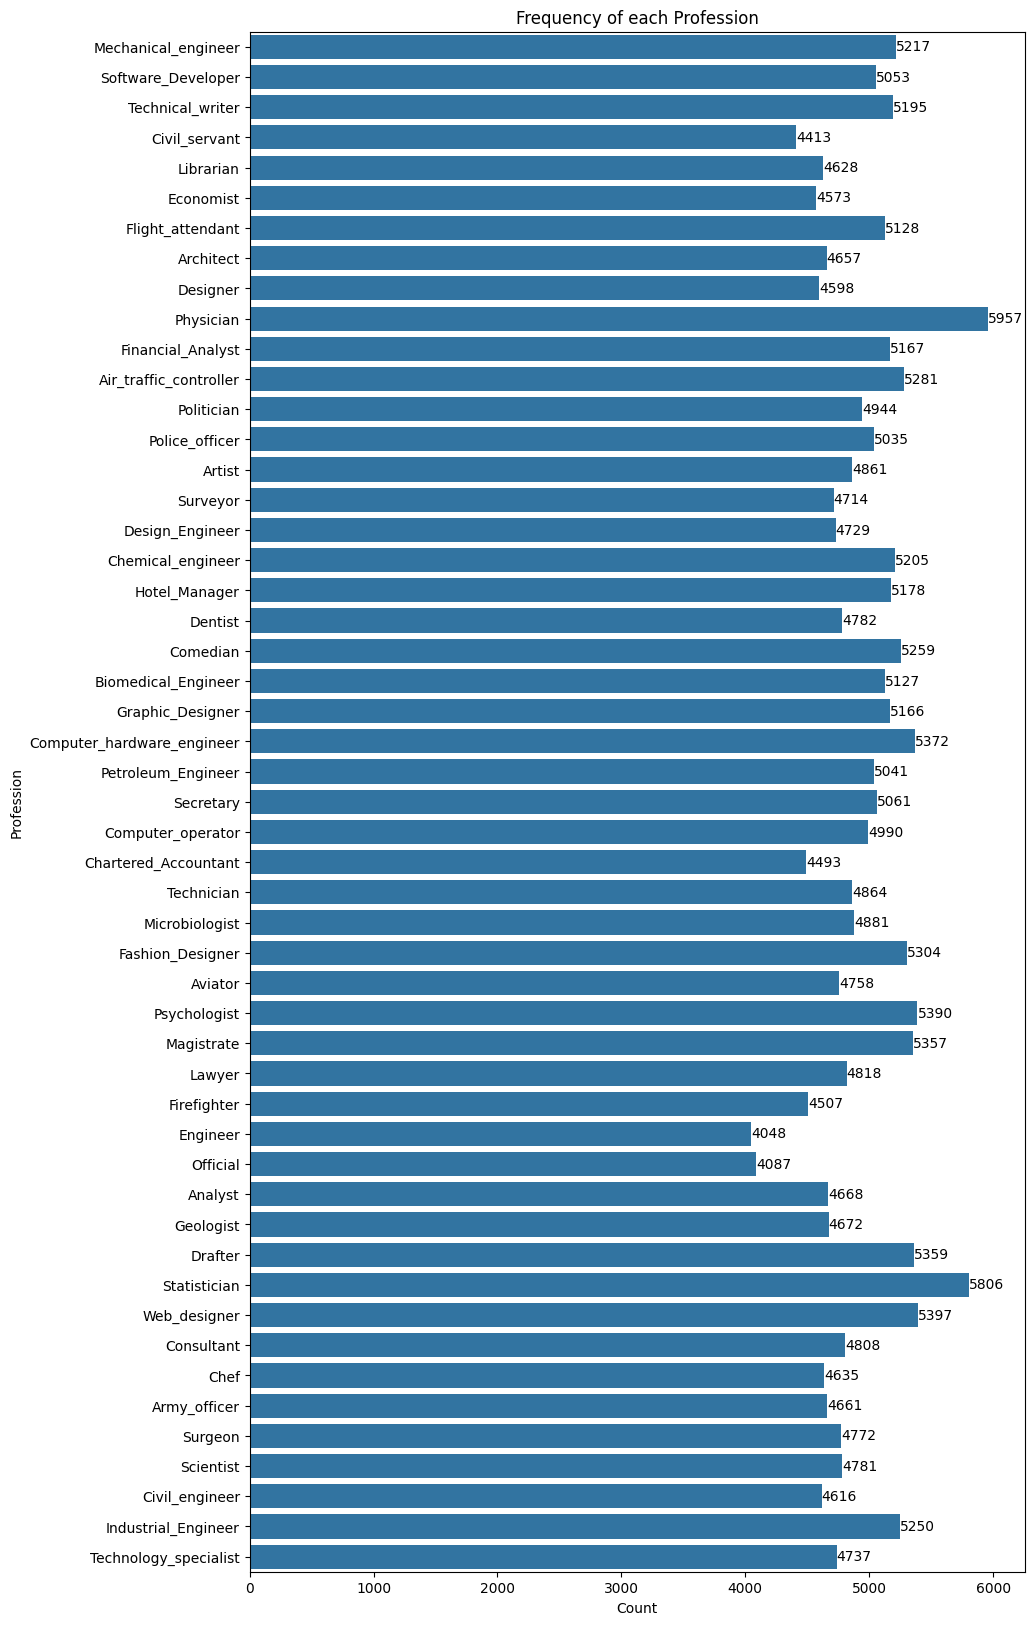

In [18]:
plt.figure(figsize=(10, 20))


ax = sns.countplot(y=df['Profession'])


plt.title("Frequency of each Profession")
plt.ylabel("Profession")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [19]:
loany=df['Risk_Flag'].replace({0:'No' ,1:'Yes'}).value_counts()

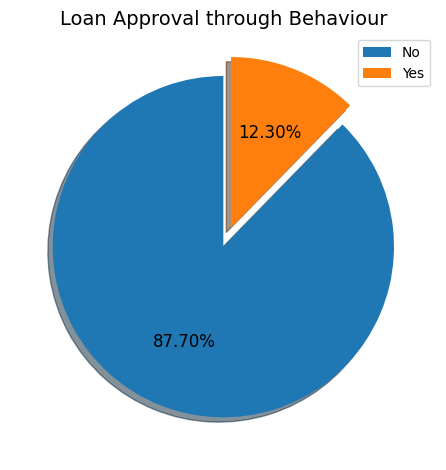

In [20]:


plt.pie(loany.values, labels=loany.index,

        startangle=90, autopct="%1.2f%%",
        labeldistance=None, textprops={'fontsize': 12}, shadow=True, explode=[0, 0.12])
plt.legend()
plt.title('Loan Approval through Behaviour', fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
df_count =df[['Married/Single']].value_counts()
df_count

Married/Single
single            226272
married            25728
Name: count, dtype: int64

Text(0.5, 1.0, 'percentage of "single/married" ')

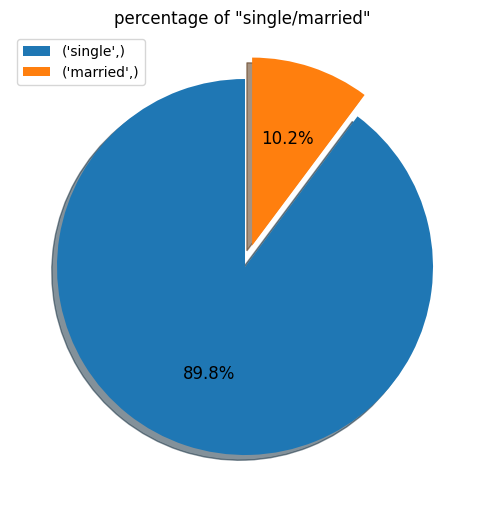

In [22]:
plt.figure(figsize=(5, 5))
plt.pie(df_count, labels=df_count.index, autopct='%1.1f%%', startangle=90,
        labeldistance=None, textprops={'fontsize': 12}, shadow=True, explode=[0, 0.12])
plt.tight_layout()
plt.legend()

plt.title('percentage of "single/married" ')

In [23]:
df_Age =df[['Age']].value_counts()
df_Age

Age
27     5197
66     5092
48     4967
33     4921
41     4827
45     4806
54     4785
68     4772
35     4643
50     4624
69     4617
76     4585
55     4563
25     4543
72     4533
79     4505
60     4504
59     4498
53     4490
47     4483
30     4468
78     4455
22     4430
34     4414
57     4394
58     4368
56     4344
24     4326
23     4322
62     4311
31     4257
70     4251
61     4235
40     4233
43     4206
21     4205
49     4203
26     4156
37     4153
71     4150
42     4134
64     4132
29     4109
67     3995
65     3969
74     3954
63     3942
77     3916
28     3901
32     3834
75     3829
39     3800
38     3793
46     3627
44     3622
73     3569
36     3444
51     3397
52     3197
Name: count, dtype: int64

In [24]:
df_age1=df_Age.head(10).sort_values( ascending=False)
df_age1

Age
27     5197
66     5092
48     4967
33     4921
41     4827
45     4806
54     4785
68     4772
35     4643
50     4624
Name: count, dtype: int64

<Axes: xlabel='Age'>

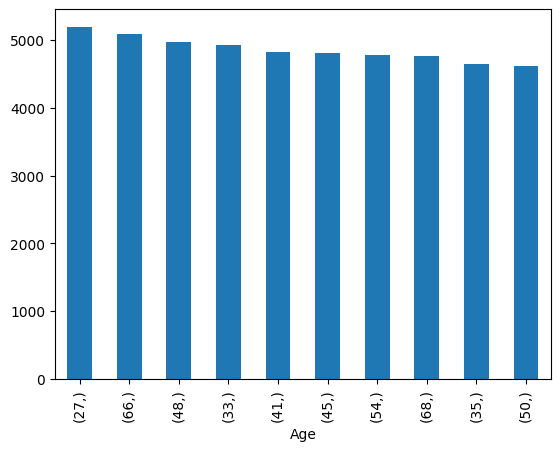

In [25]:
df_age1.plot(kind ='bar')

In [26]:


df_CITY =df[['CITY']].value_counts().head(10)
df_CITY

CITY         
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa[29]      1180
Vijayawada       1172
Srinagar         1136
Indore           1130
New_Delhi        1098
Hajipur[31]      1098
Satara           1096
Name: count, dtype: int64

<Axes: ylabel='count'>

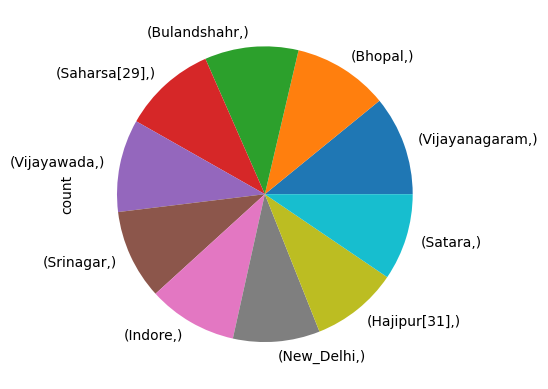

In [27]:
df_CITY.plot(kind ='pie')

In [28]:
df_owner_ship =df[['House_Ownership']].value_counts().head(10)
df_owner_ship

House_Ownership
rented             231898
owned               12918
norent_noown         7184
Name: count, dtype: int64

<Axes: xlabel='House_Ownership'>

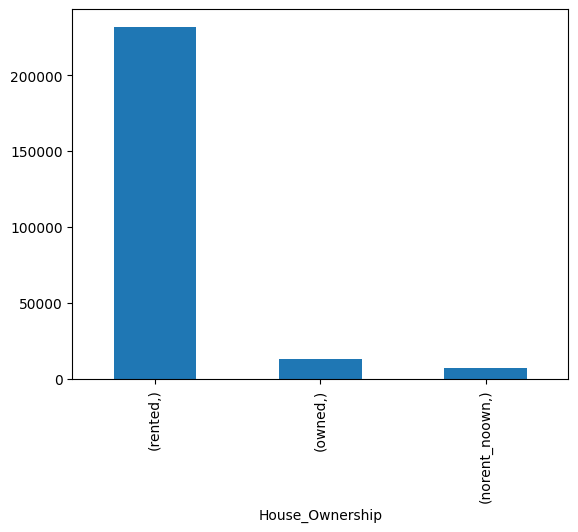

In [29]:
df_owner_ship.plot(kind ='bar')

In [30]:
df_experience =df[['Experience']].value_counts().head(10)
df_experience

Experience
6             13158
9             12936
12            12800
18            12601
10            12503
5             12441
14            12369
19            12287
17            12131
16            12106
Name: count, dtype: int64

<Axes: xlabel='Experience'>

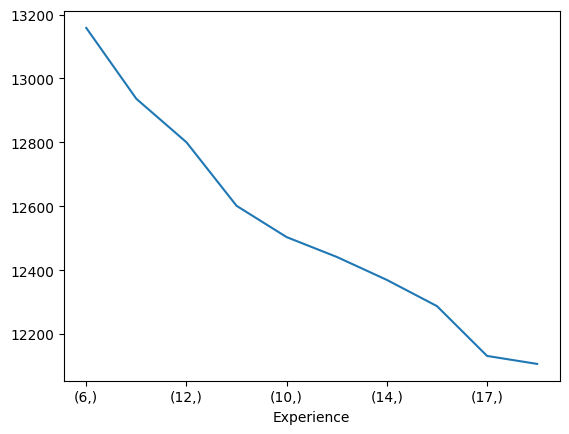

In [31]:
df_experience.plot(kind ='line')

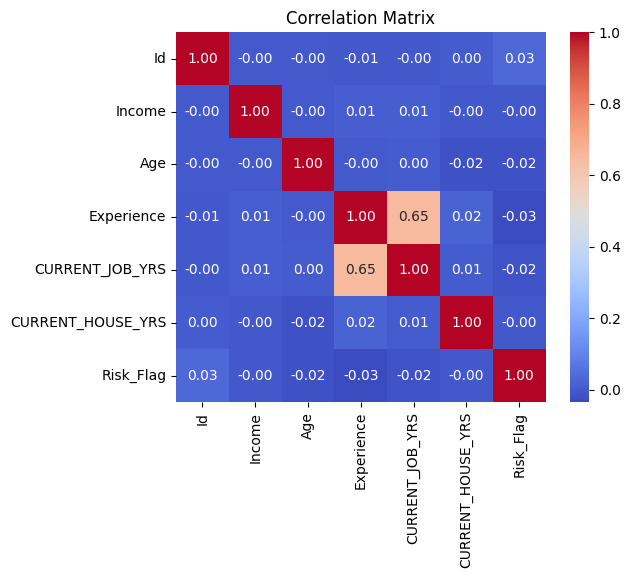

In [32]:
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
#Top Highly correlated features with the target variable
correlation_matrix['Risk_Flag'].sort_values(ascending=False)

Risk_Flag            1.000000
Id                   0.032153
Income              -0.003091
CURRENT_HOUSE_YRS   -0.004375
CURRENT_JOB_YRS     -0.016942
Age                 -0.021809
Experience          -0.034523
Name: Risk_Flag, dtype: float64

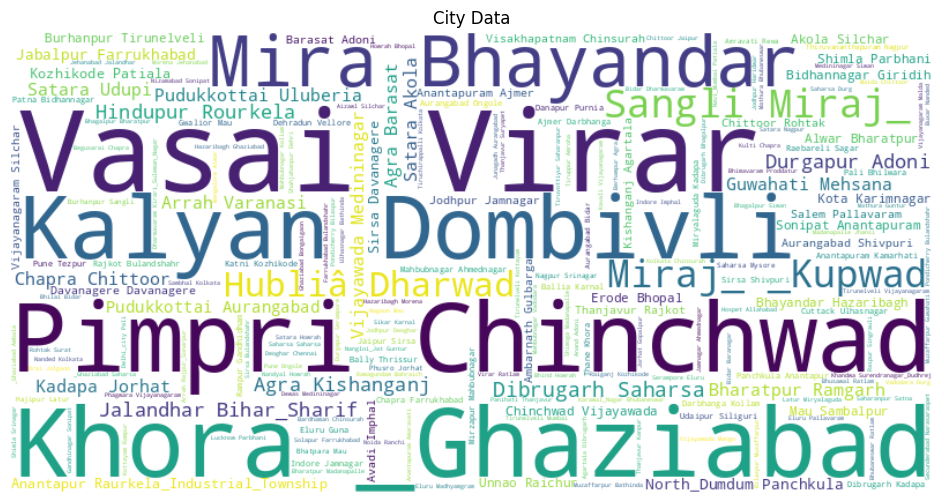

In [34]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['CITY'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('City Data')
plt.axis('off')
plt.show()


## Insights
1.singles are seeking loans mostly and the rate of risk is also low.

2.people with rented rooms and no cars are applying for loans more compared to others.

3.people with house or car are less risky.

4.all profession people are applying for loans at nearly same rate.

5.people from uttarpradesh and maharashtra are applying more for loans.

In [35]:
from sklearn.preprocessing import StandardScaler

df["Income"]=StandardScaler().fit_transform(df[["Income"]])

In [36]:
df["Married/Single"]=df["Married/Single"].replace({'single':0,'married':1}).astype(int)
df["Car_Ownership"]=df["Car_Ownership"].replace({'no':0,'yes':1}).astype(int)

In [37]:
from sklearn.preprocessing import LabelEncoder

df["House_Ownership"]= LabelEncoder().fit_transform(df[["House_Ownership"]])
df["Profession"]= LabelEncoder().fit_transform(df[["Profession"]])
df["STATE"]= LabelEncoder().fit_transform(df[["STATE"]])
df["CITY"]= LabelEncoder().fit_transform(df[["CITY"]])

## Feature Engineering and model development

WIth the help of heatmap of correlation matrix,these are the factors affecting the target column: age,exp,martial status,car,house,current job

In [39]:
# Separate features and target variable
X = df.drop(columns=['Id', 'Risk_Flag'])
y = df['Risk_Flag']



In [41]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize the features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [45]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [46]:
# Train and evaluate models
for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba)}")
    print("-" * 40)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400

AUC-ROC: 0.55135175453744
----------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     44147
           1       0.52      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400

AUC-ROC: 0.8505028330053463
----------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.61      0.5

In [48]:
from sklearn.model_selection import  cross_val_score, RandomizedSearchCV
# 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='roc_auc')

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score on Training Set (via CV):", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best Score on Training Set (via CV): 0.9366806471781518
